# รายงานศึกษาและวิเคราะห์ผู้ป่วยในโรงพยาบาลในสหรัฐฯ

# Import Libaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('white')

In [2]:
print(f'pandas version = {pd.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

pandas version = 2.1.4
seaborn version = 0.13.2
2024-12-10 16:46:02.209485


# Load data

In [74]:
df = pd.read_csv('./inpatient_data.csv')
df.head()

,patient id,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,APR Risk of Mortality Description,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,1,Western NY,Allegany,228000,39,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,M,White,...,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,0,N,Y,3826.50,1794.96
1,2,Western NY,Allegany,228000,39,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,30 to 49,148,F,White,...,Moderate,Medical,Medicaid,NaN,NaN,0,N,Y,5611.75,3357.52
2,3,Western NY,Allegany,228000,39,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,OOS,M,White,...,Moderate,Medical,Medicare,Federal/State/Local/VA,NaN,0,N,Y,4627.25,4419.10
3,4,Western NY,Allegany,228000,39,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,147,M,White,...,Minor,Medical,Medicare,Medicare,NaN,0,N,Y,2894.75,1421.59
4,5,Western NY,Allegany,228000,39,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,148,M,White,...,Major,Medical,Medicare,Self-Pay,Self-Pay,0,N,Y,6276.25,2961.15


# Getting to know the data and cleaning data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient id                           10000 non-null  int64  
 1   Health Service Area                  10000 non-null  object 
 2   Hospital County                      10000 non-null  object 
 3   Operating Certificate Number         10000 non-null  int64  
 4   Facility ID                          10000 non-null  int64  
 5   Facility Name                        10000 non-null  object 
 6   Age Group                            10000 non-null  object 
 7   Zip Code - 3 digits                  9920 non-null   object 
 8   Gender                               10000 non-null  object 
 9   Race                                 10000 non-null  object 
 10  Ethnicity                            10000 non-null  object 
 11  Length of Stay               

In [76]:
# ตรวจสอบค่าว่างและค่าซ้ำ
print('ค่าว่าง\n', df.isnull().sum())
print('แถวซ้ำ =', df.duplicated().sum())

ค่าว่าง
 patient id                                0
Health Service Area                       0
Hospital County                           0
Operating Certificate Number              0
Facility ID                               0
Facility Name                             0
Age Group                                 0
Zip Code - 3 digits                      80
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                       0
Discharge Year                            0
CCS Diagnosis Code                        0
CCS Diagnosis Description                 0
CCS Procedure Code                        0
CCS Procedure Description                 0
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description    

จากการสำรวจข้อมูลพบว่า ข้อมูลทั้งหมดที่ได้รับมามีทั้งหมด 10,000 แถว 35 คอลัมน์ โดยคอลัมน์ที่มีค่าว่าง ได้แก่ Zip Code - 3 digits, Payment Typology 2 และ Payment Typology 3 เมื่อตรวจสอบหาว่ามีแถวไหนที่มีข้อมูลซ้ำกันบ้าง พบว่าไม่มีแถวไหนที่มีค่าซ้ำกันเลย

In [77]:
# เปลี่ยนชื่อคอลัมน์
def rename_column(column_name):
    column_lower = column_name.lower()
    return column_lower.replace(' ', '_')

df.columns = [rename_column(col) for col in df.columns]

### สำรวจระยะเวลาที่ผู้ป่วยพักในโรงพยาบาล ค่าบริการที่เรียกเก็บจากผู้ป่วย และต้นทุนในการให้บริการ

In [ ]:
# คำนวณค่าระยะเวลาที่ผู้ป่วยพักในโรงพยาบาล (length_of_stay), ค่าบริการที่เรียกเก็บจากผู้ป่วย (total_charges) และต้นทุนในการให้บริการ (total_costs)
# เลือกเฉพาะคอลัมน์ตัวเลขที่ต้องการวิเคราะห์
describe = ['length_of_stay', 'total_charges', 'total_costs']
df[describe].describe().T.round(3)
# โดยเฉลี่ยแล้วมีผู้ป่วยเข้าพักในโรงพยาบาลนาน 5 วัน/การรักษา 1 ครั้ง

,count,mean,std,min,25%,50%,75%,max
length_of_stay,10000.0,5.244,7.885,1.00,2.000,3.000,6.000,120.00
total_charges,10000.0,21275.728,40355.828,580.20,6134.255,10999.395,22417.672,1343179.07
total_costs,10000.0,9979.494,17271.607,225.07,3027.902,5476.490,10849.255,517331.90


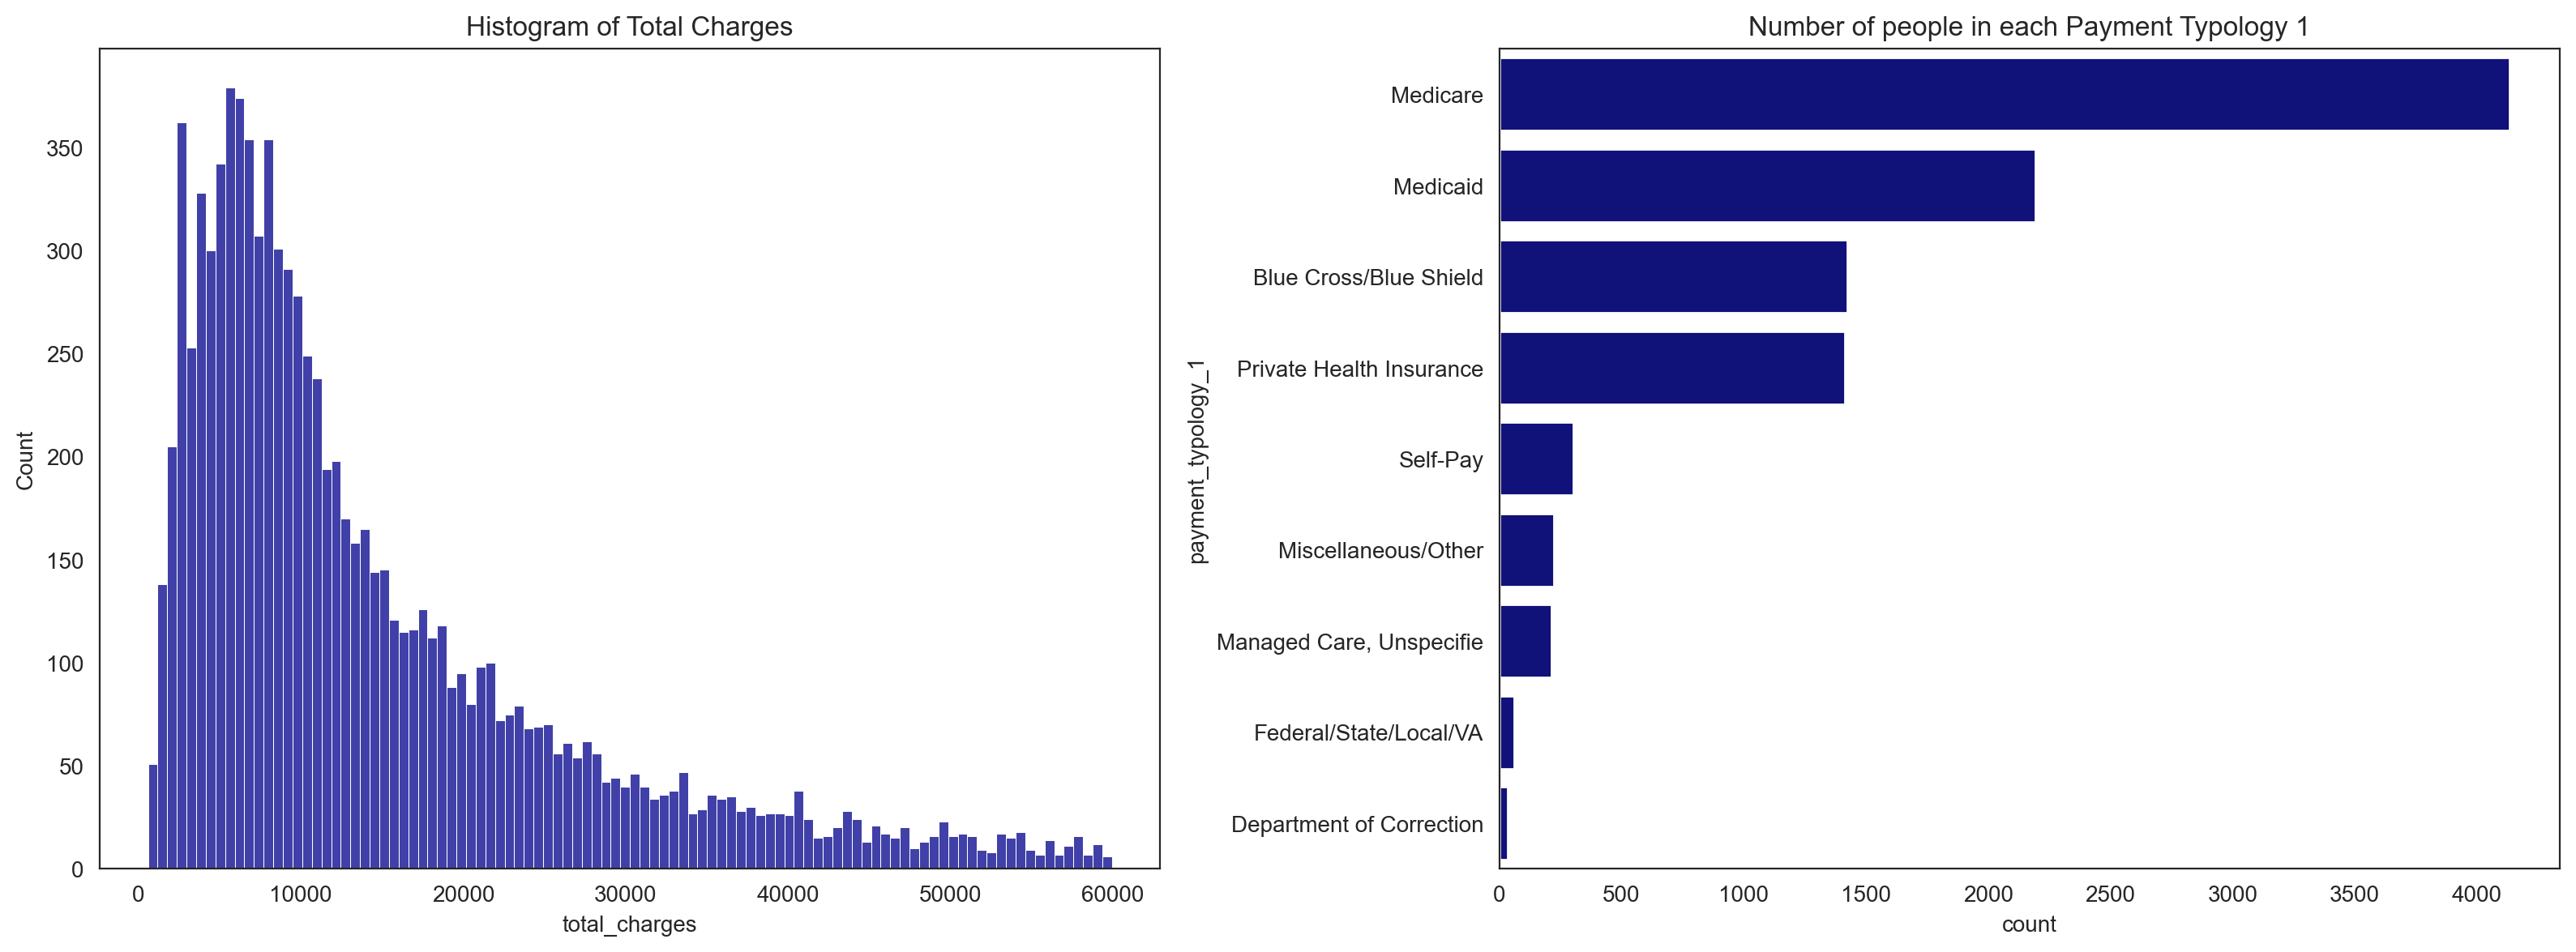

In [190]:
# สร้างกราฟแสดงการกระจายตัวของข้อมูล total_charges ที่มีค่าไม่เกิน 60,000 (ดูจากค่า mean และ std)
# การชำระเงินหลัก (Payment Typology 1) ของผู้ป่วยเป็นแบบไหน
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.histplot(df[df['total_charges'] < 60000]['total_charges'], color= 'darkblue', bins = 100, ax=axes[0])
axes[0].set_title('Histogram of Total Charges')

sns.countplot(y = 'payment_typology_1', data=df, color= 'darkblue', order = df['payment_typology_1'].value_counts().index, ax=axes[1])
axes[1].set_title('Number of people in each Payment Typology 1');

plt.tight_layout()

<Axes: xlabel='length_of_stay', ylabel='Count'>

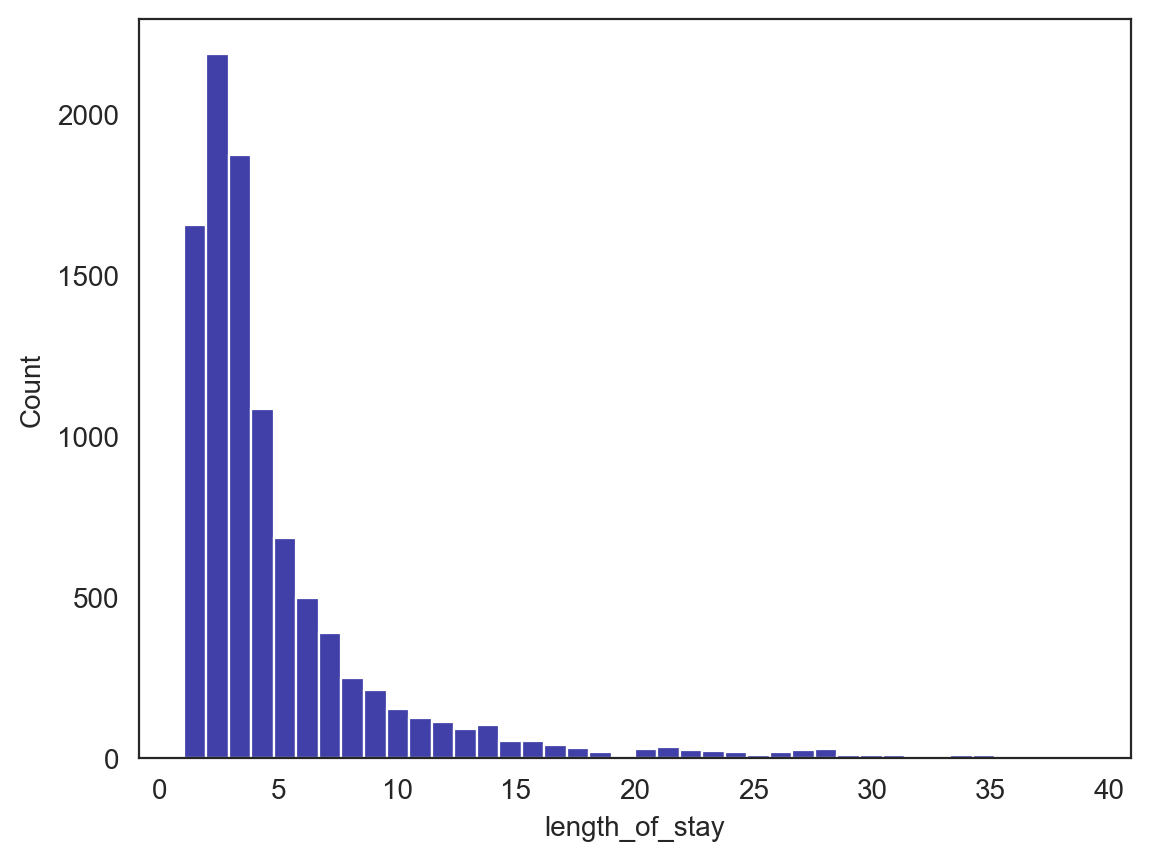

In [191]:
# แสดงการกระจายตัวของข้อมูล length_of_stay
sns.histplot(df[df['length_of_stay'] < 40]['length_of_stay'], color= 'darkblue', bins = 40)

ส่วนใหญ่ผู้ป่วยเข้ามาพักรักษาตัวในโรงพยาบาลนาน 1 - 5 วัน

หลังจากแปลงชื่อคอลัมน์ใหม่ให้ไม่มีช่องว่างและสำรวจคอลัมน์ที่เป็นตัวเลขแล้ว ลำดับถัดไปจะเริ่มสำรวจข้อมูล โดยจะดูตามหัวข้อต่อไปนี้
1. จำนวนผู้ป่วยที่เข้ามาตรวจและรักษาแต่ละช่วงอายุ
2. จำนวนผู้ป่วยที่เข้ามาแต่ละประเภท (type_of_admission)
3. การจัดการผู้ป่วยแยกตามประเภท (patient_disposition)
4. จำนวนผู้ป่วยแยกตามประเภทโรค 10 อันดับแรกที่มากที่สุด (ccs_diagnosis_description)
5. จำนวนผู้ป่วยแยกตามวิธีการรักษา 10 อันดับแรกที่มากที่สุด (ccs_procedure_description)
6. ระดับอาการความรุนแรงและระดับความเสี่ยงต่อการเสียชีวิต (apr_severity_of_illness_description, apr_risk_of_mortality_description, apr_medical_surgical_description) ; ประเมินทรัพยากรในการรักษา

### 1. จำนวนผู้ป่วยที่เข้ามาตรวจและรักษาแต่ละช่วงอายุ

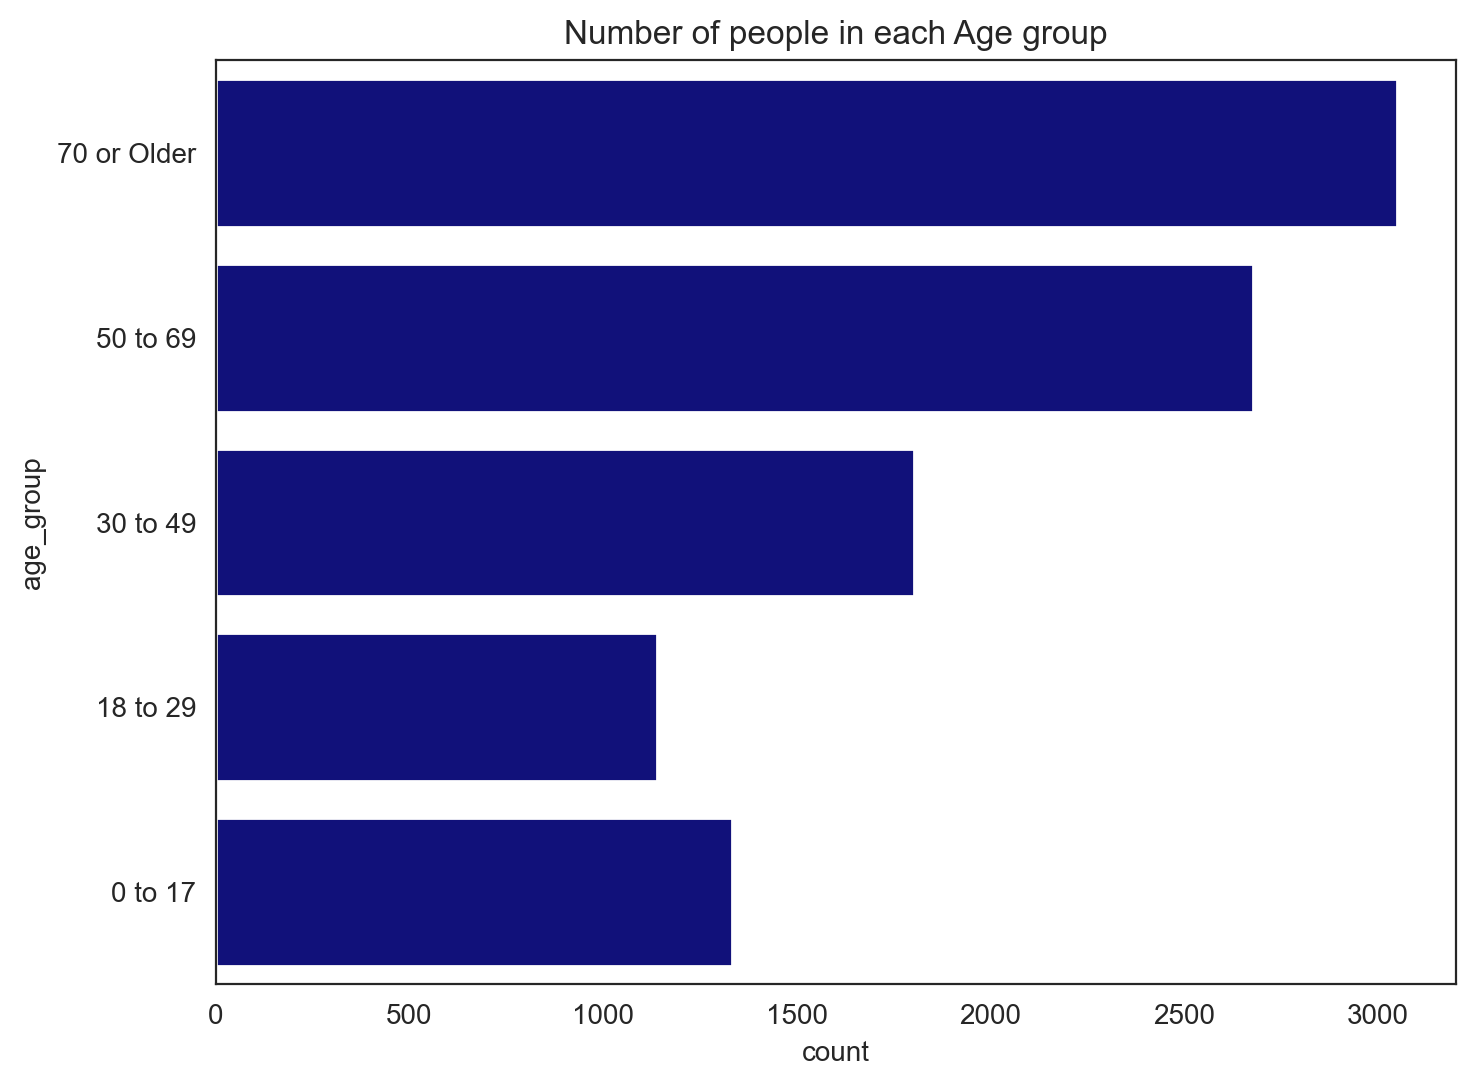

In [36]:
# 1. จำนวนผู้ป่วยที่เข้ามาตรวจและรักษาแต่ละช่วงอายุ
age_order = ['70 or Older', '50 to 69', '30 to 49', '18 to 29', '0 to 17']

plt.figure(figsize=(8,6))
sns.countplot(y = 'age_group', data=df, color= 'darkblue', order = age_order)
plt.title('Number of people in each Age group');

จากกราฟข้างบน จำนวนผู้ป่วยที่เข้ารับการรักษามากที่สุดคือกลุ่มคนอายุ 70 ปีขึ้นไป จึงค้นหาต่อไปว่ากลุ่มโรคที่คนกลุ่มนี้เป็นกันเยอะคืออะไร

In [87]:
diag70 = df[df['age_group'] == '70 or Older']['ccs_diagnosis_description'].value_counts().head(10).reset_index()
diag70

,ccs_diagnosis_description,count
0,Septicemia (except in labor),186
1,Congestive heart failure; nonhypertensive,162
2,Osteoarthritis,129
3,Pneumonia (except that caused by tuberculosis ...,124
4,Acute cerebrovascular disease,123
5,Cardiac dysrhythmias,117
6,Acute myocardial infarction,105
7,Chronic obstructive pulmonary disease and bron...,96
8,Urinary tract infections,78
9,Fracture of neck of femur (hip),76


In [205]:
ccs70 = df[(df['age_group'] == '70 or Older') & (df['ccs_diagnosis_description'].isin(['Septicemia (except in labor)', 'Congestive heart failure; nonhypertensive', 'Osteoarthritis']))]
ccs70[['ccs_diagnosis_description', 'apr_drg_description']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head(9)

,ccs_diagnosis_description,apr_drg_description,count
0,Septicemia (except in labor),Septicemia & disseminated infections,172
1,Congestive heart failure; nonhypertensive,Heart failure,148
2,Osteoarthritis,Knee joint replacement,75
3,Osteoarthritis,Hip joint replacement,44
4,Septicemia (except in labor),Infectious & parasitic diseases including HIV ...,10
5,Osteoarthritis,Other musculoskeletal system & connective tiss...,7
6,Congestive heart failure; nonhypertensive,Cardiac defibrillator & heart assist implant,6
7,Congestive heart failure; nonhypertensive,Cardiac catheterization for coronary artery di...,4
9,Septicemia (except in labor),Other infectious & parasitic diseases,2


โรคที่ผู้ป่วยผู้สูงอายุเป็นกันมากที่สุด คือโรค Septicemia/การติดเชื้อในกระแสเลือด มีสาเหตุส่วนใหญ่มาจาก ภาวะโลหิตเป็นพิษและการติดเชื้อแบบแพร่กระจาย (Septicemia & disseminated infections) รองลงมาคือโรค Congestive heart failure/ภาวะหัวใจล้มเหลว ที่มีสาเหตุมาจากภาวะแทรกซ้อนของโรคกล้ามเนื้อหัวใจขาดเลือด หรือมาจากเชื้อไวรัสบางชนิด และโรคที่เป็นกันอันดับ 3 คือโรค Osteoarthritis/โรคข้อกระดูกอ่อนเสื่อม เป็นโรคที่เกิดขึ้นเมื่อมีอายุมากขึ้น น้ำหนักตัวที่เกิน อยู่ในท่าที่ไม่เหมาะสมเป็นเวลานาน อุบัติเหตุ หรือเกิดจากกรรมพันธุ์ จากข้อมูล ผู้สูงอายุมาด้วยอาการปวดเข่าหรือสะโพก   

เมื่อทราบถึงโรคที่ผู้สูงอายุเป็นกันเยอะ ต่อไปจะทำการหาต่อว่าโรคเหล่านี้ส่วนใหญ่เกิดขึ้นที่ประเทศอะไร

In [206]:
resultTop = ccs70[['ccs_diagnosis_description', 'hospital_county']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head(9)
resultTop

,ccs_diagnosis_description,hospital_county,count
0,Septicemia (except in labor),Erie,121
1,Osteoarthritis,Erie,101
2,Congestive heart failure; nonhypertensive,Erie,88
3,Congestive heart failure; nonhypertensive,Niagara,31
4,Septicemia (except in labor),Niagara,29
5,Congestive heart failure; nonhypertensive,Chautauqua,20
6,Septicemia (except in labor),Genesee,12
7,Osteoarthritis,Chautauqua,12
8,Congestive heart failure; nonhypertensive,Cattaraugus,10


Text(0, 0.5, 'Diagnosis')

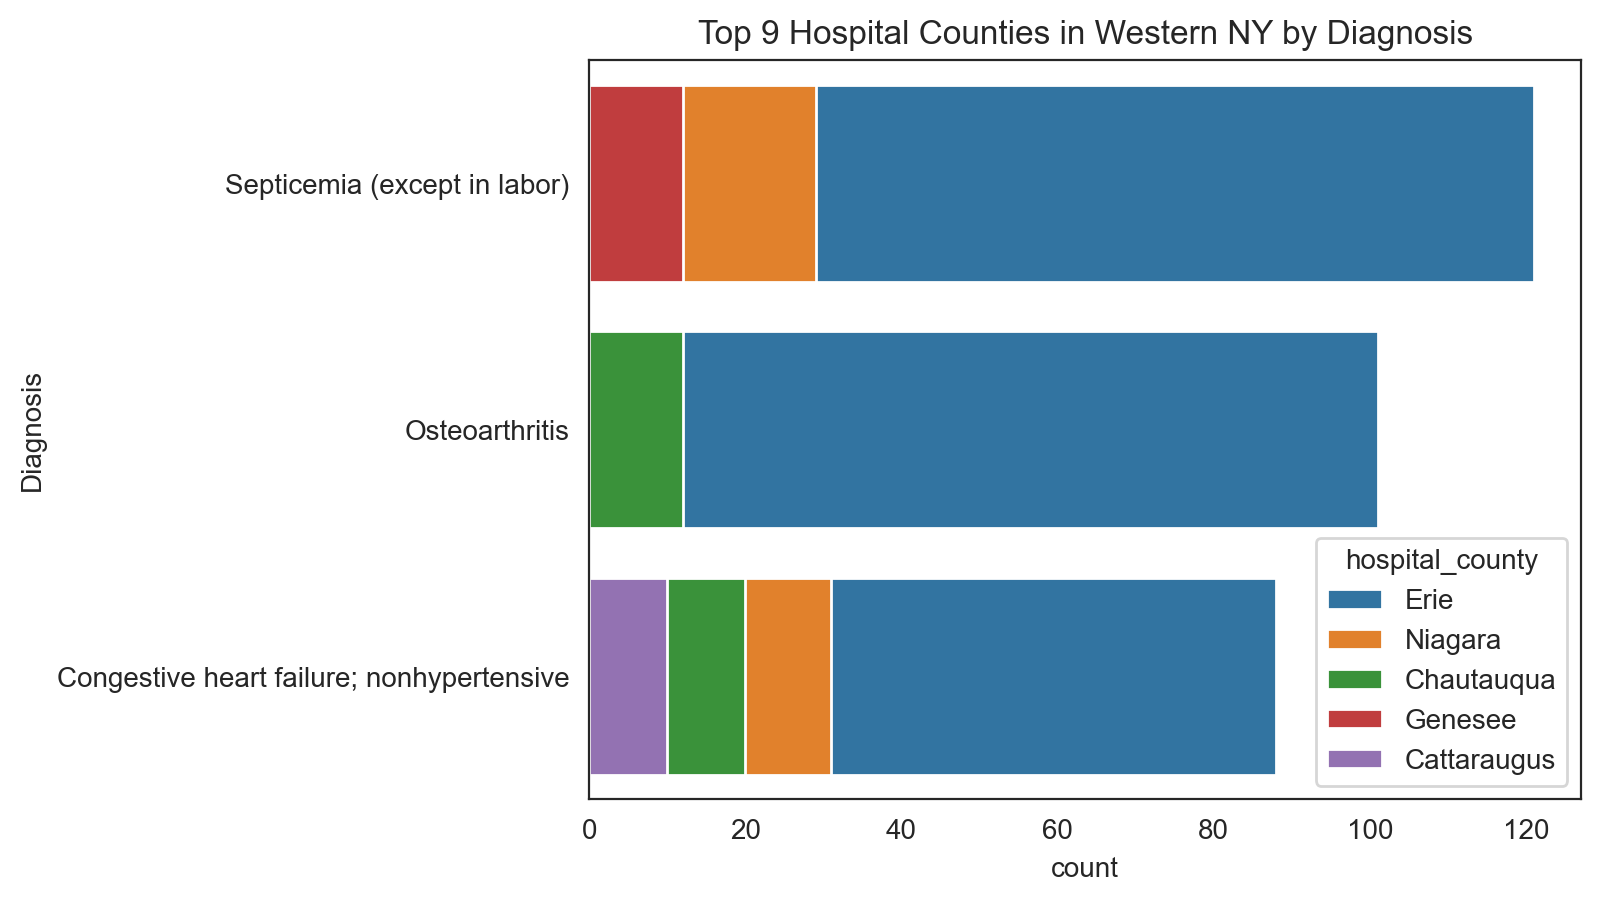

In [199]:
# สร้างกราฟ Stacked Bar
sns.barplot(data=resultTop, y='ccs_diagnosis_description', x='count', hue='hospital_county', dodge=False)
plt.title('Top 9 Hospital Counties in Western NY by Diagnosis')
plt.ylabel('Diagnosis')

ผู้ป่วยส่วนใหญ่ของ 3 โรคนี้ เกิดขึ้นมากที่สุดที่ประเทศ Erie รองลงมาคือ Niagara และ Chautauqua ต่อไปเป็นการลงลึกว่าโรงพยาบาลที่พบผู้ป่วยที่เป็นโรคเหล่านี้คือโรงพยาบาลอะไร

In [197]:
# โรงพยาบาลที่พบผู้ป่วยที่เป็น 3 โรคนี้ในประเทศ Erie
ccs70[ccs70['hospital_county'] == 'Erie'][['ccs_diagnosis_description', 'facility_name']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

,ccs_diagnosis_description,facility_name,count
0,Septicemia (except in labor),Mercy Hospital,40
1,Osteoarthritis,Buffalo General Medical Center,27
2,Osteoarthritis,Kenmore Mercy Hospital,25
3,Osteoarthritis,Millard Fillmore Suburban Hospital,22
4,Congestive heart failure; nonhypertensive,Kenmore Mercy Hospital,20
5,Congestive heart failure; nonhypertensive,Mercy Hospital,19
6,Congestive heart failure; nonhypertensive,Millard Fillmore Suburban Hospital,19
7,Septicemia (except in labor),Millard Fillmore Suburban Hospital,17
8,Septicemia (except in labor),Buffalo General Medical Center,16
9,Septicemia (except in labor),Kenmore Mercy Hospital,14


โรงพยาบาลในประเทศ Erie ที่เจอผู้ป่วยเป็นโรค Septicemia มากที่สุดคือโรงพยาบาล Mercy ส่วนโรค Congestive heart failure คือโรงพยาบาล Kenmore Mercy รองลงมาคือ โรงพยาบาล Mercy และโรค Osteoarthritis	เจอในโรงพยาบาล Buffalo General Medical ทางโรงพยาบาลอาจพิจารณาส่งบุคลากรทางการแพทย์ที่มีความเชี่ยวชาญในการรักษาแต่ละโรคเหล่านี้ไปตามโรงพยาบาลที่มีความต้องการเร่งด่วนหรือจัดเตรียมทรัพยากรที่จำเป็นต้องใช้ในการรักษาแต่ละโรคให้เพียงพอกับความต้องการ

### 2. จำนวนผู้ป่วยที่เข้ามาแต่ละประเภท

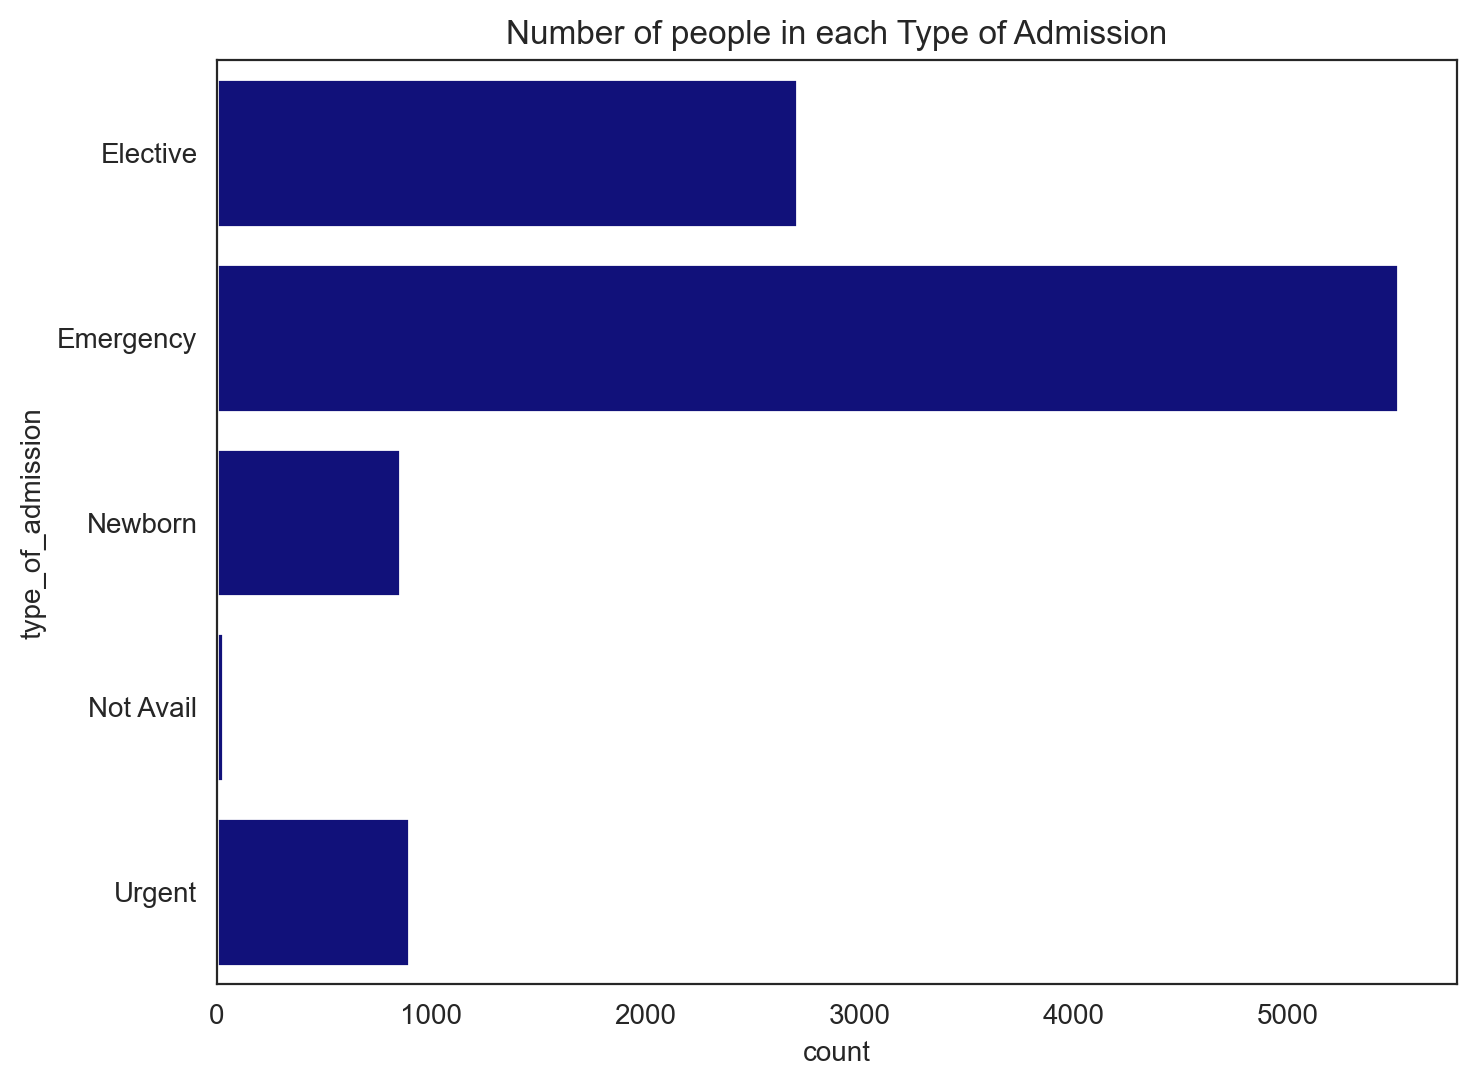

In [44]:
# 2. จำนวนผู้ป่วยที่เข้ามาแต่ละประเภท
plt.figure(figsize=(8,6))
sns.countplot(y = 'type_of_admission', data = df, color = 'darkblue', order = sorted(df['type_of_admission'].unique()))
plt.title('Number of people in each Type of Admission');

ส่วนใหญ่ผู้ป่วยที่เข้ามาเป็นประเภท Emergency จึงทำการหาต่อไปว่าคนที่เข้ามาส่วนใหญ่เจ็บป่วยอะไร

In [ ]:
diagEmer = df[df['type_of_admission'] == 'Emergency']['ccs_diagnosis_description'].value_counts().head(10).reset_index()
diagEmer

,ccs_diagnosis_description,count
0,Septicemia (except in labor),302
1,Pneumonia (except that caused by tuberculosis ...,210
2,Congestive heart failure; nonhypertensive,199
3,Mood disorders,186
4,Cardiac dysrhythmias,185
5,Acute cerebrovascular disease,182
6,Chronic obstructive pulmonary disease and bron...,161
7,Diabetes mellitus with complications,143
8,Schizophrenia and other psychotic disorders,131
9,Acute myocardial infarction,130


โรค 3 อันดับแรกที่เข้ามาแบบ Emergency คือ โรค Septicemia/การติดเชื้อในกระแสเลือด รองลงมาคือโรค Pneumonia/ปอดบวม และอันดับ 3 คือโรค Congestive heart failure/ภาวะหัวใจล้มเหลว ถัดไปคือหาว่า 3 โรคนี้ถูกพบบ่อยในประเทศไหน

In [167]:
ccsEmer = df[(df['type_of_admission'] == 'Emergency') & (df['ccs_diagnosis_description'].isin(['Septicemia (except in labor)', 'Congestive heart failure; nonhypertensive', 'Pneumonia (except that caused by tuberculosis or sexually transmitted disease)']))]
ccsEmer[['ccs_diagnosis_description', 'health_service_area', 'hospital_county']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head(9)

,ccs_diagnosis_description,health_service_area,hospital_county,count
0,Septicemia (except in labor),Western NY,Erie,211
1,Pneumonia (except that caused by tuberculosis ...,Western NY,Erie,129
2,Congestive heart failure; nonhypertensive,Western NY,Erie,123
3,Septicemia (except in labor),Western NY,Niagara,48
4,Congestive heart failure; nonhypertensive,Western NY,Niagara,39
5,Pneumonia (except that caused by tuberculosis ...,Western NY,Niagara,35
6,Septicemia (except in labor),Western NY,Genesee,17
7,Pneumonia (except that caused by tuberculosis ...,Western NY,Chautauqua,16
8,Septicemia (except in labor),Western NY,Cattaraugus,12


ประเทศ Erie เป็นประเทศที่เจอเยอะมากสุด จึงทำการหาต่อไปว่า ในประเทศนี้ แต่ละโรคเจอในกลุ่มคนช่วงอายุเท่าไหร่บ้าง

In [173]:
ccsEmer[ccsEmer['hospital_county'] == 'Erie'][['ccs_diagnosis_description', 'age_group', 'hospital_county']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head(9)

,ccs_diagnosis_description,age_group,hospital_county,count
0,Septicemia (except in labor),70 or Older,Erie,111
1,Congestive heart failure; nonhypertensive,70 or Older,Erie,79
2,Pneumonia (except that caused by tuberculosis ...,70 or Older,Erie,69
3,Septicemia (except in labor),50 to 69,Erie,65
4,Congestive heart failure; nonhypertensive,50 to 69,Erie,37
5,Pneumonia (except that caused by tuberculosis ...,50 to 69,Erie,31
6,Septicemia (except in labor),30 to 49,Erie,27
7,Pneumonia (except that caused by tuberculosis ...,0 to 17,Erie,17
8,Pneumonia (except that caused by tuberculosis ...,30 to 49,Erie,10


ส่วนใหญ่ที่เจอจะเป็นผู้สูงอายุ โรงพยาบาลอาจพิจารณาเน้นจัดสรรทรัพยากรให้กับคนกลุ่มนี้ หรือมุ่งให้ความรู้ด้านวิธีป้องกันหรือวิธีดูแลรักษาให้กลุ่มคนสูงอายุ เพื่อลดการอัตราการเกิดโรค

### 3. การจัดการผู้ป่วยแยกตามประเภท

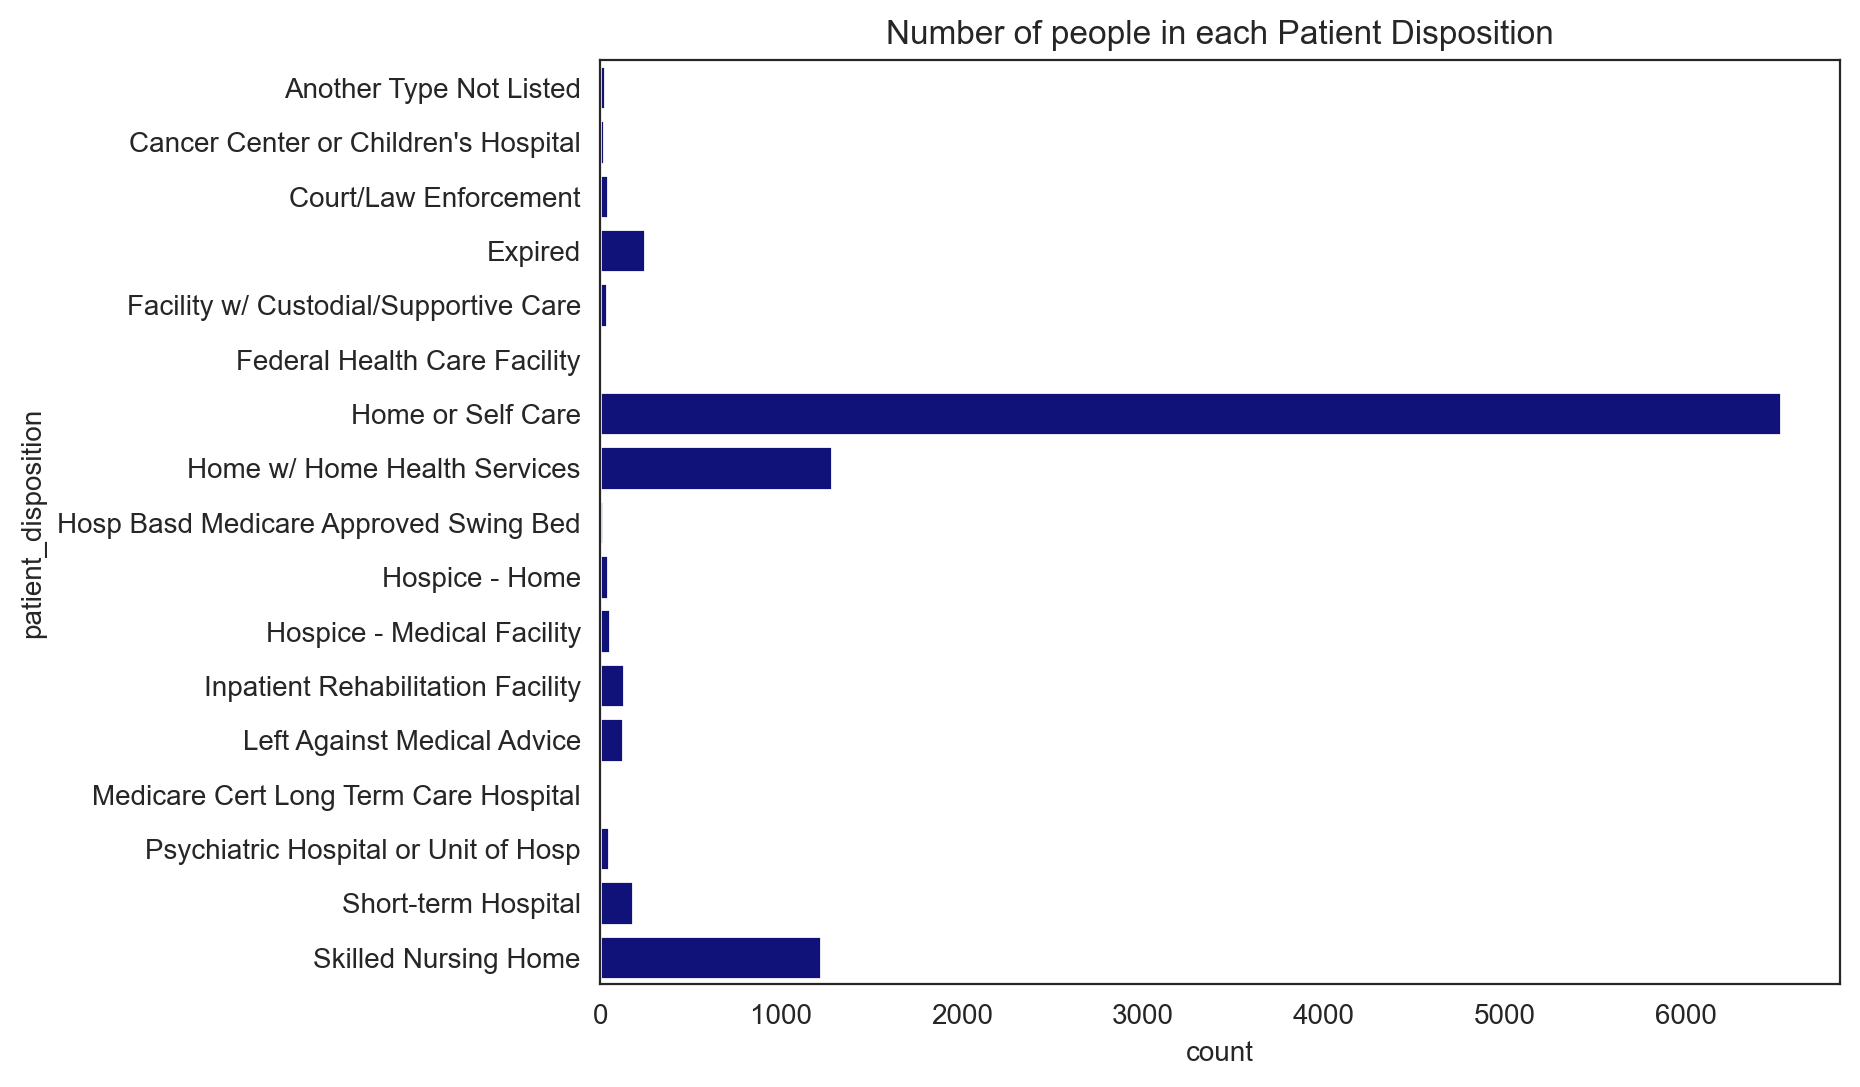

In [ ]:
# 3. การจัดการผู้ป่วยแยกตามประเภท
plt.figure(figsize=(8,6))
sns.countplot(y = 'patient_disposition', data = df, color = 'darkblue', order = sorted(df['patient_disposition'].unique()))
plt.title('Number of people in each Patient Disposition');

ส่วนใหญ่ผู้ป่วยจะกลับไปรักษาตัวต่อที่บ้าน รองลงมาจึงใช้บริการ Home Health Services และ Nursing Home ถัดไปจะทำการสำรวจต่อว่า 2 ตัวเลือกหลังเกิดขึ้นใน Health Service Area และประเทศไหนเยอะ

In [208]:
dispos = df[df['patient_disposition'].isin(['Home w/ Home Health Services', 'Skilled Nursing Home'])]
dispos[['patient_disposition', 'hospital_county']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head()

,patient_disposition,hospital_county,count
0,Home w/ Home Health Services,Erie,1063
1,Skilled Nursing Home,Erie,856
2,Skilled Nursing Home,Niagara,170
3,Home w/ Home Health Services,Niagara,125
4,Skilled Nursing Home,Chautauqua,94


จากตารางข้างบน ประเทศ Erie พบว่าใช้บริการ Home Health Services และ Nursing Home เยอะ ทางโรงพยาบาลอาจพิจารณาขยายสาขา/เพิ่มการลงทุนในอุตสาหกรรมนี้ เพื่อให้การบริการเข้าถึงผู้ป่วยได้มากขึ้น

### 4. จำนวนผู้ป่วยแยกตามประเภทโรค 10 อันดับแรกที่มากที่สุด

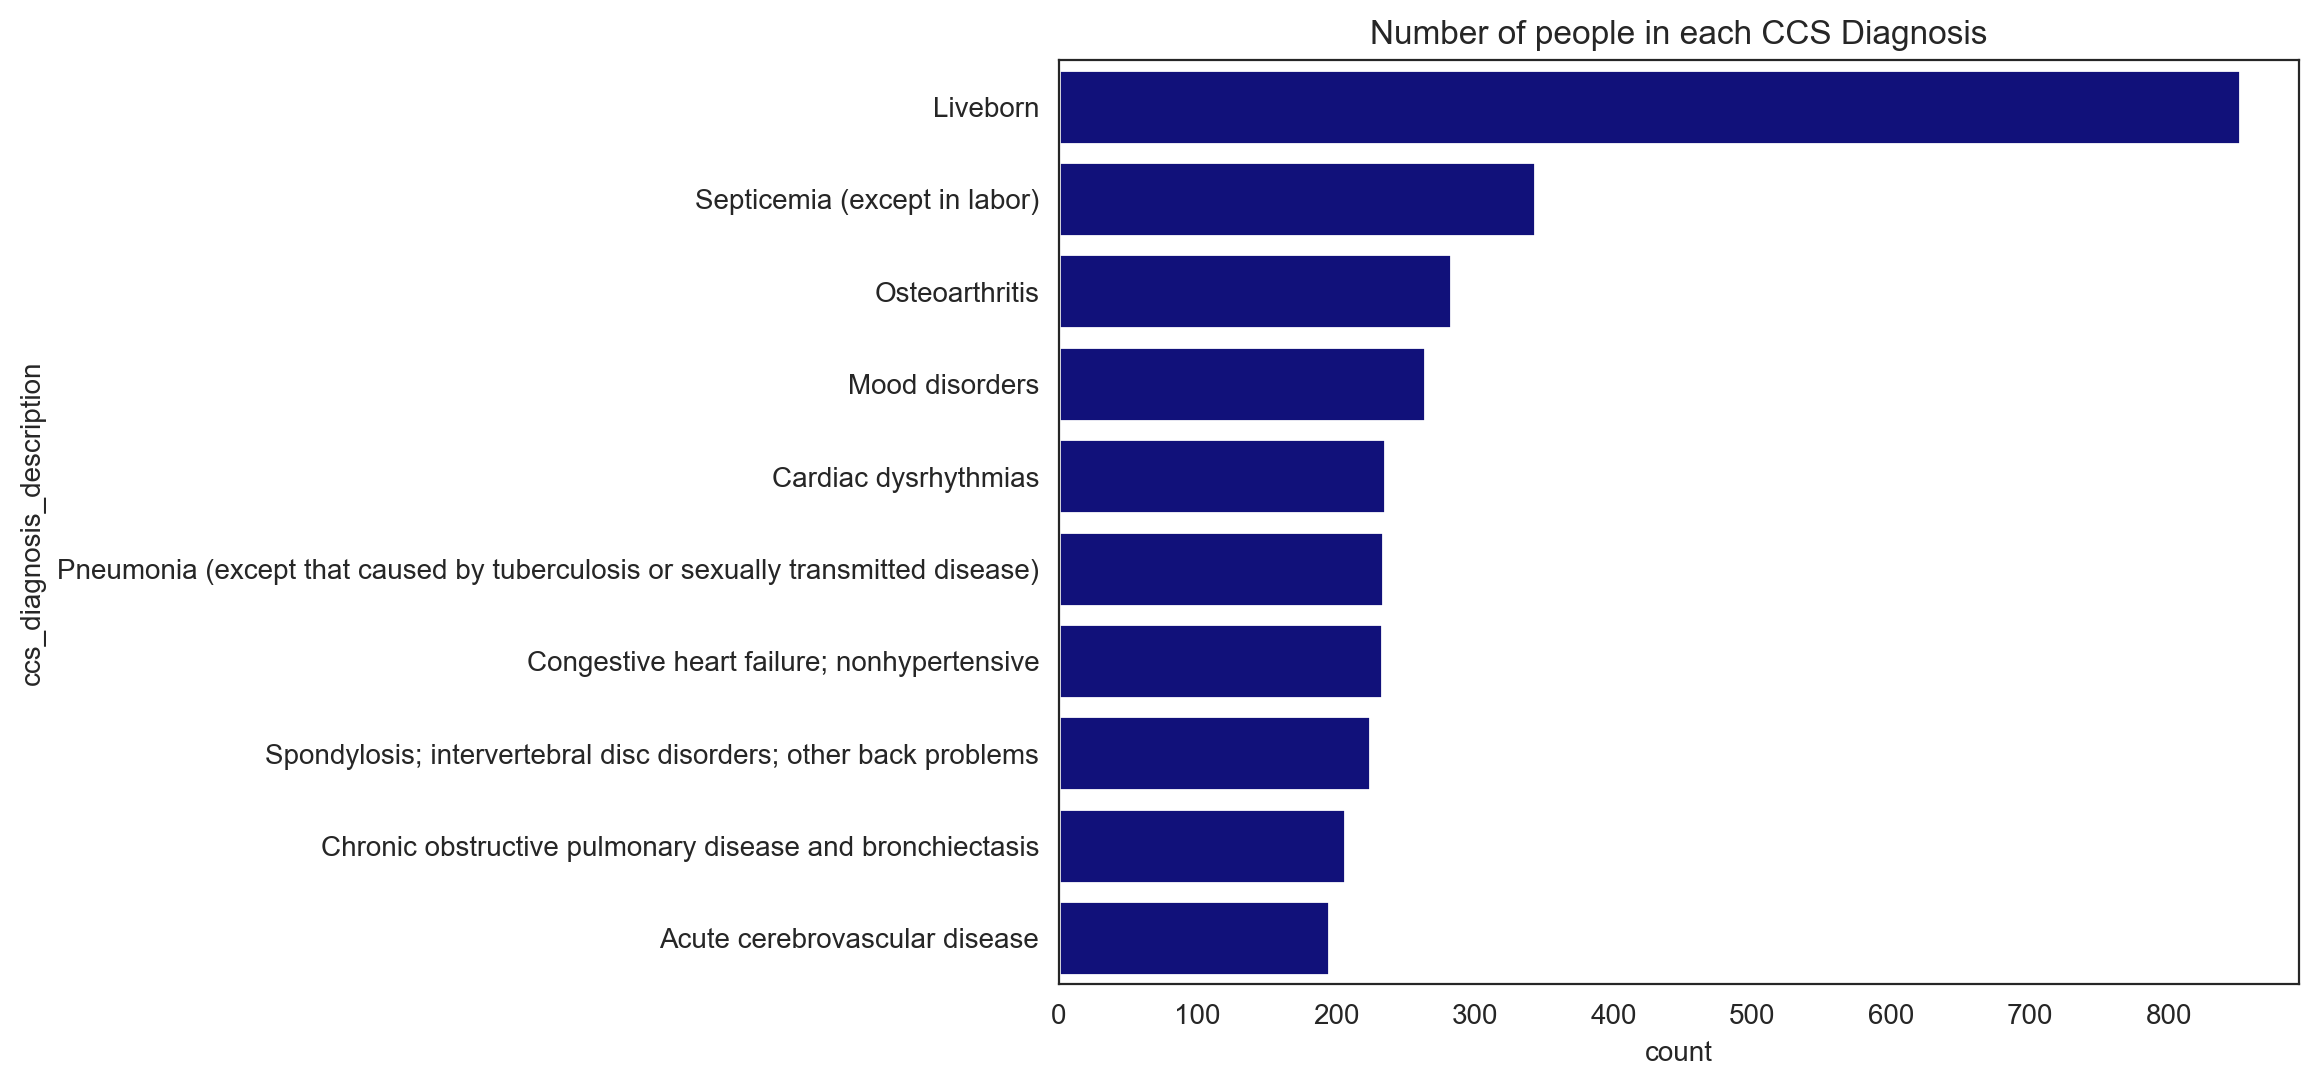

In [60]:
# 4. จำนวนผู้ป่วยแยกตามประเภทโรค 10 อันดับแรกที่มากที่สุด
plt.figure(figsize=(8,6))
sns.barplot(y = 'ccs_diagnosis_description', x='count', data = df['ccs_diagnosis_description'].value_counts().head(10).reset_index(), color = 'darkblue')
plt.title('Number of people in each CCS Diagnosis');

โรคที่เจอมากที่สุดในผู้ป่วยคือ Liveborn/การคลอดบุตร ถัดไปจะเป็นการหาว่าเกิดขึ้นในประเทศไหนเยอะ

In [179]:
df[df['ccs_diagnosis_description'] == 'Liveborn'][['ccs_diagnosis_description', 'hospital_county']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False).head(9)

,ccs_diagnosis_description,hospital_county,count
0,Liveborn,Erie,621
1,Liveborn,Niagara,72
2,Liveborn,Chautauqua,67
3,Liveborn,Genesee,31
4,Liveborn,Cattaraugus,27
5,Liveborn,Allegany,17
6,Liveborn,Wyoming,16


การคลอดบุตร เกิดขึ้นมากในประเทศ Erie, Niagara และ Chautauqua ตามลำดับ ทางโรงพยาบาลอาจพิจารณาเพิ่มบุคลากรทางการแพทย์ด้านสูตินรีแพทย์และกุมารแพทย์ไปประจำที่ประเทศเหล่านี้เพิ่ม เพื่อรองรับผู้ป่วยที่อาจเพิ่มมากขึ้นและลดภาระการทำงานหนักเกินไปของแทพย์ (กรณีที่ประเทศนั้นขาดแคลนบุคลากรที่เชี่ยวชาญ ทำให้แพทย์ที่เหลืออยู่ต้องรับภาระงานหนักขึ้น) ถัดไปจะเจาะลึกไปที่ประเทศ Erie เพื่อหาว่าโรงพยาบาลไหนมีอัตราการคลอดบุตรสูง

In [202]:
# โรงพยาบาลที่มีอัตราคลอดทารกสูง
df[(df['ccs_diagnosis_description'] == 'Liveborn') & (df['hospital_county'] == 'Erie')][['facility_name', 'ccs_diagnosis_description']].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

,facility_name,ccs_diagnosis_description,count
0,Sisters of Charity Hospital,Liveborn,173
1,Women And Children's Hospital Of Buffalo,Liveborn,165
2,Mercy Hospital,Liveborn,142
3,Millard Fillmore Suburban Hospital,Liveborn,141


โรงพยาบาลในประเทศ Erie ที่มีผู้ป่วยคลอดบุตรสูงสุดคือ โรงพยาบาล Sisters of Charity รองลงมาคือ Women And Children's Hospital Of Buffalo อาจเน้นเพิ่มบุคลากรทางการแพทย์ที่ 2 สถานที่นี้ก่อน

### 5. จำนวนผู้ป่วยแยกตามวิธีการรักษา 10 อันดับแรกที่มากที่สุด

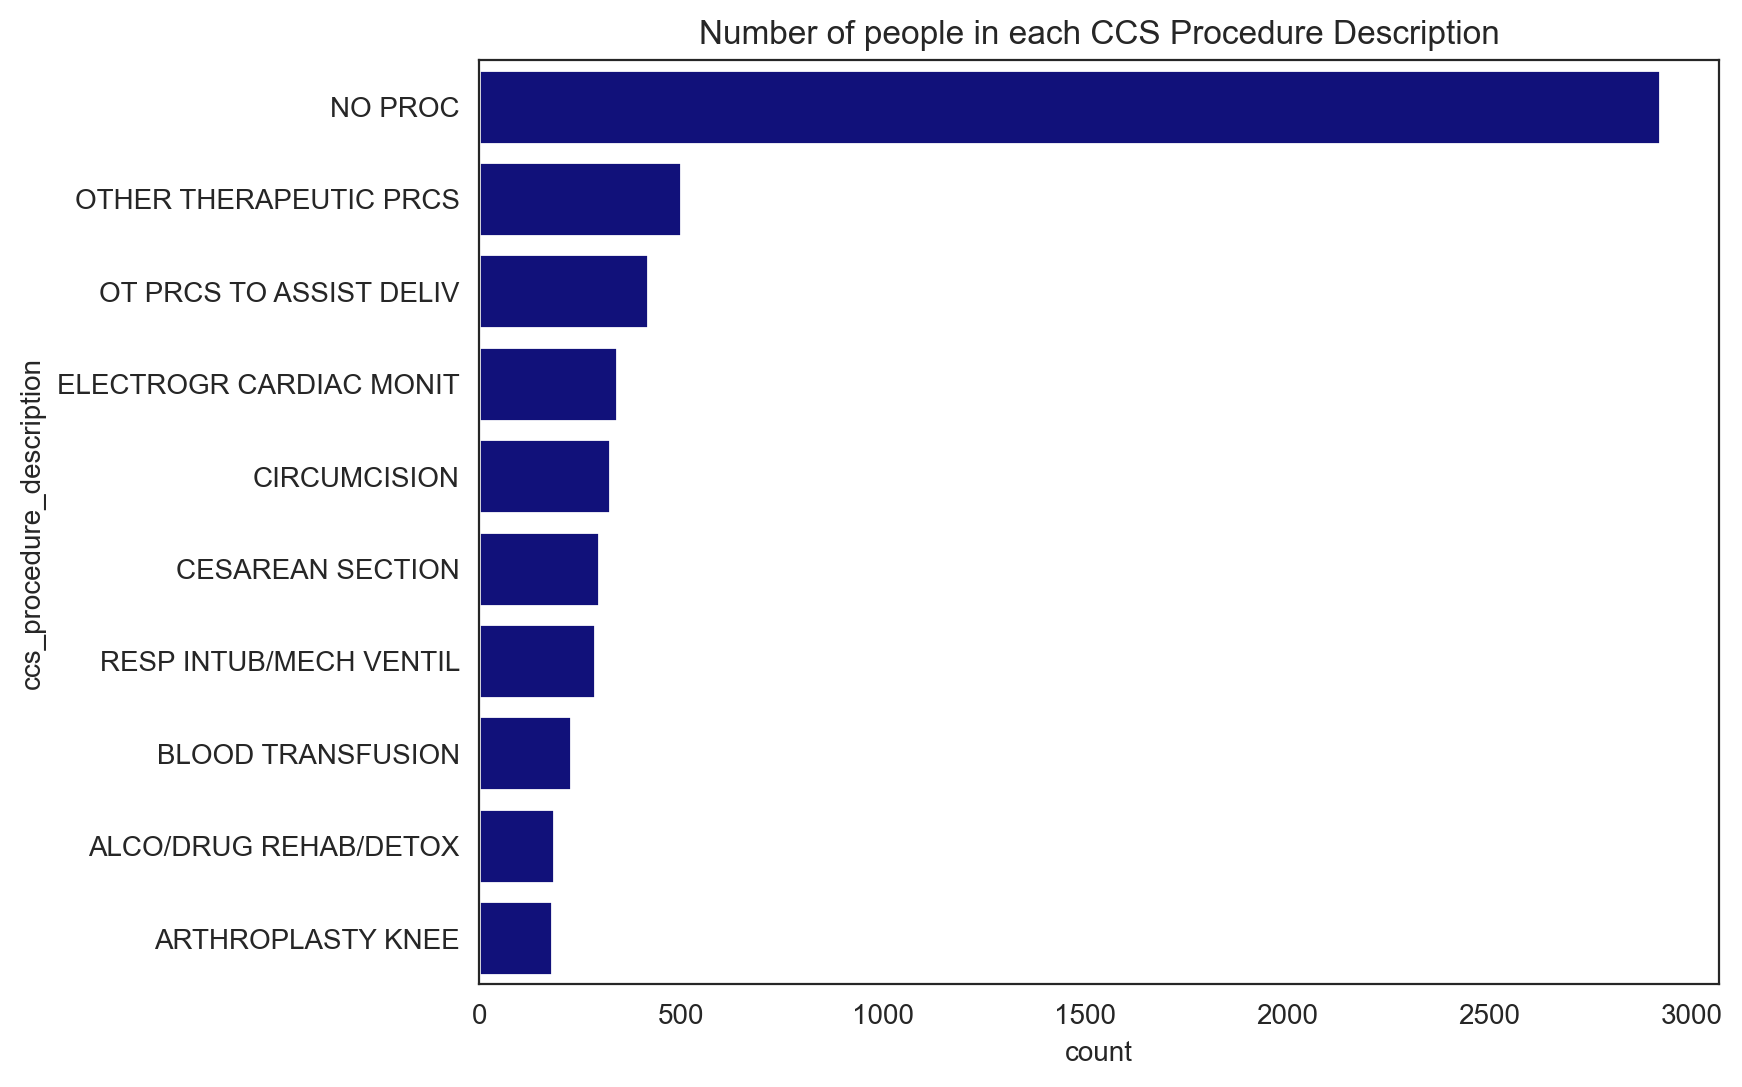

In [61]:
# 5. จำนวนผู้ป่วยแยกตามวิธีการรักษา 10 อันดับแรกที่มากที่สุด
plt.figure(figsize=(8,6))
sns.barplot(y = 'ccs_procedure_description', x='count', data = df['ccs_procedure_description'].value_counts().head(10).reset_index(), color = 'darkblue')
plt.title('Number of people in each CCS Procedure Description');

กลุ่มผู้ป่วยส่วนใหญ่ที่เข้ามารับการรักษาเป็นแบบ NO PROC หรือ ไม่มีการทำหัตถการ ซึ่งหมายความว่าจะเป็นการรักษาแบบทั่วไป อย่างการให้ยา การพบแพทย์ หรือติดตามอาการ เป็นต้น จากข้อมูลข้างต้น ทางโรงพยาบาลอาจวางแผนด้านทรัพยากรบุคคลที่เน้นดูแลรักษาโรคทั่วไป  

ถัดไปเป็นการสำรวจว่ากลุ่มผู้ป่วยที่มีอาการและมีความเสี่ยงต่อการเสียชีวิตแยกตามระดับความรุนแรง

### 6. ระดับความรุนแรงของอาการและระดับความเสี่ยงต่อการเสียชีวิต

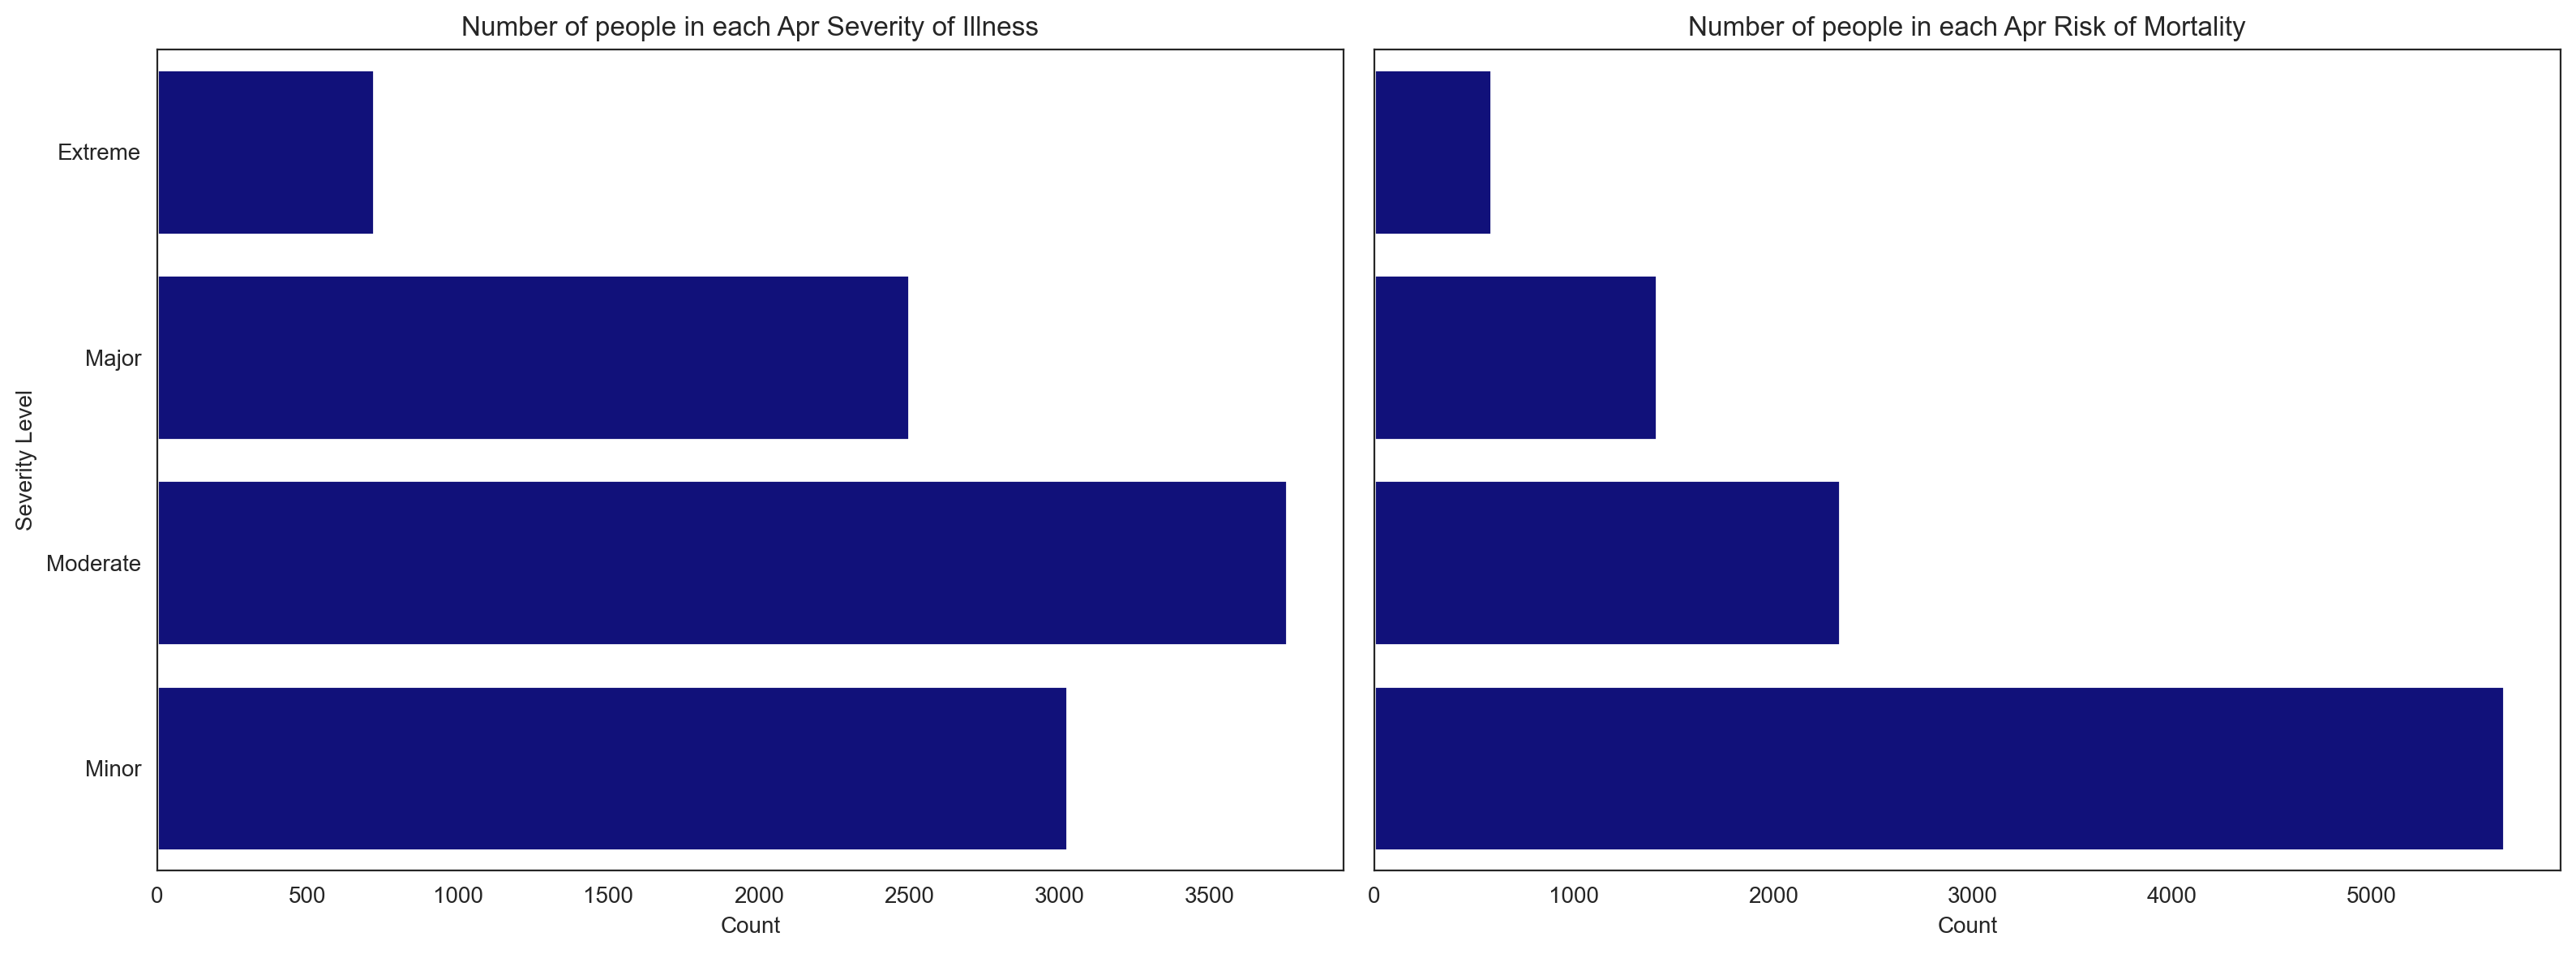

In [ ]:
# 6. ระดับความรุนแรงของอาการและระดับความเสี่ยงต่อการเสียชีวิต
# สร้างกราฟแสดงกลุ่มผู้ป่วยแยกตามระดับความรุนแรงของอาการและระดับความเสี่ยง
sev_order = ['Extreme', 'Major', 'Moderate', 'Minor']
risk_order = ['Extreme', 'Major', 'Moderate', 'Minor']

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# กราฟซ้าย: Apr Severity of Illness
sns.countplot(y='apr_severity_of_illness_description', data=df, color='darkblue', order=sev_order, ax=axes[0])
axes[0].set_title('Number of people in each Apr Severity of Illness')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Severity Level')

# กราฟขวา: Apr Risk of Mortality
sns.countplot(y='apr_risk_of_mortality_description', data=df, color='darkblue', order=risk_order, ax=axes[1])
axes[1].set_title('Number of people in each Apr Risk of Mortality')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Risk Level')

plt.tight_layout()

จากกราฟเปรียบเทียบระดับความรุนแรงของอาการ (APR SOI) และระดับความเสี่ยงต่อการเสียชีวิต (APR ROM) พบว่า APR SOI ที่ถูกวินิจฉัยว่าอยู่ในระดับ Major หรือ Extreme เมื่อถูกวินิจฉัยในด้าน APR ROM กลับพบว่ามีจำนวนน้อยกว่า แสดงให้เห็นว่า ไม่ใช่ทุกกรณีที่ความรุนแรงของอาการมีความสัมพันธ์แบบแปรผันตรงกับความเสี่ยงต่อการเสียชีวิต นอกจากนี้ยังพบว่า APR SOI ที่มีจำนวนมากที่สุด คือระดับ Moderate ในขณะที่ APR ROM ที่มีจำนวนมากที่สุด คือระดับ Minor ซึ่งอาจตีความได้ว่าโรคที่มีอาการรุนแรงนั้นสามารถถูกรักษา/จัดการได้ ทำให้ความเสี่ยงต่อการเสียชีวิตลดลง

In [113]:
# ผู้ป่วยที่มีอาการรุนแรงระดับสูงสุดซึ่งคือระดับ 4 ส่วนใหญ่ได้รับการผ่าตัดหรือให้ยามากกว่ากัน 
# ผู้ป่วยที่มีความเสี่ยงต่อการเสียชีวิตสูงซึ่งคือระดับ 4 ได้รับการรักษาแบบ Medical หรือ Surgical 
serExt = df[df['apr_severity_of_illness_description'] == 'Extreme']['apr_medical_surgical_description'].value_counts().reset_index()
serExt

,apr_medical_surgical_description,count
0,Medical,540
1,Surgical,181


In [114]:
riskExt = df[df['apr_risk_of_mortality_description'] == 'Extreme']['apr_medical_surgical_description'].value_counts().reset_index()
riskExt

,apr_medical_surgical_description,count
0,Medical,448
1,Surgical,139


จากตารางข้างบน APR SOI ที่ระดับ Extreme มีจำนวน 721 คน ในขณะที่ APR ROM มีจำนวน 587 คน คิดเป็น 18.6% ที่ผู้ป่วยที่ถูกวินิจฉัยว่ามีอาการอยู่ในขั้นรุนแรง แต่ระดับความเสี่ยงต่อชีวิตไม่ได้อยู่ในขั้นรุนแรงเหมือนกัน โดยการรักษาของผู้ป่วยระดับ Extreme จะถูกรักษาโดยการให้ยามากกว่าจะผ่าตัด

###### หมายเหตุ : 18.6% = (721 - 587)/721 * 100

# สรุป
จากการสำรวจข้อมูลพบว่ากลุ่มผู้ป่วยที่เข้ามารับการรักษา อยู่ในช่วงอายุ 70 ปีขึ้นไป โดยโรคที่ผู้สูงอายุเหล่านี้เป็นกันเยอะคือ Septicemia, Congestive heart failure และ Osteoarthritis ซึ่ง 2 โรคเป็นการเข้ามารักษาแบบ Emergency นอกจากนี้ยังมีโรค Pneumonia ที่เข้ามาเยอะเช่นกัน ส่วนใหญ่เกิดขึ้นในประเทศ Erie และ Niagara นอกจากนี้ใน 2 ประเทศนี้ยังมีอัตราการคลอดทารกสูงเช่นกัน ส่วนด้านการจัดการผู้ป่วย ส่วนใหญ่จะเป็น Self Care แต่ก็ยังมีด้าน Home Health Service และ Nursing Home ที่ถูกเลือก โดยการรักษาของผู้ป่วยสส่วนใหญ่คือ ไม่มีการทำหัตถการ เน้นให้ยาและติดตามเฝ้าดูอาการ และจากข้อมูลพบว่าการรักษาผู้ป่วยที่ถูกวินิจฉัยว่าอยู่ในระดับรุนแรง (Extreme) นั้นไม่ได้อยู่ในระดับความเสี่ยงต่อการเสียชีวิตที่ระดับเดียวกัน แสดงให้เห็นว่าโรคสามารถถูกรักษาได้

# ข้อเสนอเพิ่มเติม
- ควรเพิ่มบุคลากรทางการแพทย์ที่มีความเชี่ยวชาญในการรักษาโรค Septicemia, Congestive heart failure, Osteoarthritis และ Pneumonia ไปในประเทศ Erie และ Niagara เพื่อรองรับการเข้ามารักษาของผู้ป่วยและลดการรับภาระงานหนักของแพทย์
    * ควรเพิ่มบุคลากรด้านโรค Septicemia ที่โรงพยาบาล Mercy ก่อน
    * ควรเพิ่มบุคลากรด้านโรค Congestive heart failure ที่โรงพยาบาล Kenmore Mercy ก่อน จากนั้นจึงค่อยเป็นโรงพยาบาล Mercy
    * ควรเพิ่มบุคลากรด้านโรค Osteoarthritis ที่โรงพยาบาล Buffalo General Medical ก่อน
- ควรเพิ่มบุคลากรทางการแพทย์ด้านสูตินรีแพทย์และกุมารแพทย์ที่ประเทศ Erie เพราะมีอัตราการคลอดทารกสูงกว่าประเทศอื่นมาก อาจมีการขาดแคลนทรัพยากรในด้านนี้ และการเพิ่มกุมารแพทย์ ทำเพื่อรองรับการเพิ่มประชากรของเด็กในอนาคต  
    * ควรเพิ่มบุคลากรด้านนี้ที่โรงพยาบาล Sisters of Charity ก่อน จากนั้นจึงค่อยเป็นโรงพยาบาล Women And Children's Hospital Of Buffalo
- ควรจัดสรรทรัพยากรแผนก Emergency ให้เพียงพอ เพื่อรองรับผู้ป่วย
- ควรเพิ่มสถานที่บริการ/เพิ่มสาขาในด้าน Home Health Services และ Nursing Home เพื่อให้เข้าถึงกลุ่มผู้ป่วยได้มากขึ้น
- ทางโรงพยาบาลสามารถจัดลำดับความสำคัญในการดูแลผู้ป่วย ได้ดังนี้
    * High Severity + High Risk : ดูแลรักษาอย่างเร่งด่วน
    * High Severity + Low Risk : เน้นควบคุม เฝ้าดูอาการ
    * Low Severity + High Risk : เน้นป้องกันภาวะเสี่ยงที่อาจเกิดขึ้น
    * Low Severity + Low Risk : ดูแลรักษาทั่วไป

# ข้อมูลอ้างอิง :
- https://www.medparkhospital.com/disease-and-treatment/septicemia 
- https://www.phukethospital.com/th/healthy-articles/congestive-heart-failure/ 
- https://www.phyathai.com/th/article/3784-รู้จักโรคข้อเข่าเสื่อ
- https://ddc.moph.go.th/uploads/publish/1319320220921075939.pdf